# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


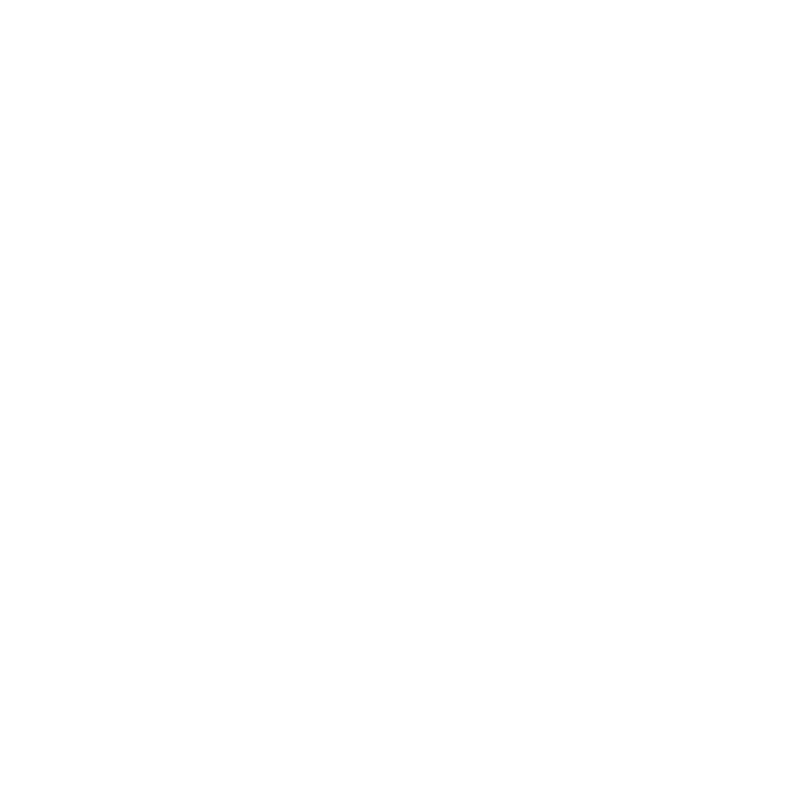

In [454]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
from    matplotlib.backends.backend_agg import  FigureCanvasAgg
from    matplotlib.figure   import  Figure


def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [455]:

import  pandas  as  pd
import  matplotlib.pyplot   as  plt
import  matplotlib  as  mp
import  numpy   as  np
import datetime 

df=pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv", skiprows=[1,2], index_col=False)



# Sort out
only2015 = df.where(df['Date'].str.contains('2015')).dropna()
only2015['Date'] = only2015.Date.str[5:]


new_df = df[~df["Date"].str.contains('2015')]
df2=new_df

df.sort_values(by="Date", ascending=True)
# Pick one station to look at first
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]
#Enrique, very simple: take the max of all TMAX per day
#(there are 365 days in those years, they of course repeat, there is more than one January 1st, for example),
# then take the min of all TMIN per day, then plot it per day and shade in between. That's the graph you see. 
#[Note: I ignored Feb 29 in this answer.]
# Got the instructions from some guy in the forums. 
# Now to sort out february 29th from this project. 
df2.loc[df["Date"].str[-1] == '02-29',"Date"] = df2["Date"].str[:-1]

ac = filter_rows_by_values(df2,"Date",["2004-02-29"])
ac.sort_values(by="Date",ascending=True)

# Okay I think the dates are all correct It returns nothing.
df2["Date"]= pd.to_datetime(df2["Date"])

df2.replace({'TMAX':'max', 'TMIN':'min'},inplace=True)

# Record Highs

maxoverall = df2.groupby('Date')['Data_Value'].max()
print(maxoverall.head())
minoverall = df2.groupby('Date')['Data_Value'].min() 
print(minoverall.head())
# Now for 2015 also?
max2015  = only2015.groupby('Date')['Data_Value'].max()
print(only2015.head())
# 
min2015 = only2015.groupby('Date')['Data_Value'].min()
print(min2015.head())

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Date
2005-01-01    156
2005-01-02    139
2005-01-03    133
2005-01-04     39
2005-01-05     33
Name: Data_Value, dtype: int64
Date
2005-01-01   -56
2005-01-02   -56
2005-01-03     0
2005-01-04   -39
2005-01-05   -94
Name: Data_Value, dtype: int64
             ID   Date Element  Data_Value
17  USC00205563  01-03    TMIN       -39.0
28  USC00203712  03-17    TMAX       189.0
32  USC00200032  06-06    TMIN       128.0
44  USW00014833  08-30    TMIN       178.0
48  USC00202308  08-30    TMIN       156.0
Date
01-01   -133.0
01-02   -122.0
01-03    -67.0
01-04    -88.0
01-05   -155.0
Name: Data_Value, dtype: float64


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


In [456]:
# Maximum overall values
print(only2015.max())
print(only2015.min())

ID            USW00094889
Date                12-31
Element              TMIN
Data_Value            361
dtype: object
ID            USC00200032
Date                01-01
Element              TMAX
Data_Value           -343
dtype: object


In [457]:
maxoverall

Date
2005-01-01    156
2005-01-02    139
2005-01-03    133
2005-01-04     39
2005-01-05     33
2005-01-06      0
2005-01-07      6
2005-01-08     17
2005-01-09     28
2005-01-10     44
2005-01-11     44
2005-01-12    139
2005-01-13    161
2005-01-14    150
2005-01-15    -33
2005-01-16    -33
2005-01-17    -50
2005-01-18    -33
2005-01-19     11
2005-01-20     11
2005-01-21    -39
2005-01-22    -72
2005-01-23    -44
2005-01-24     11
2005-01-25     28
2005-01-26     28
2005-01-27      6
2005-01-28    -11
2005-01-29     17
2005-01-30     28
             ... 
2014-12-02     33
2014-12-03     61
2014-12-04     50
2014-12-05     50
2014-12-06     67
2014-12-07     67
2014-12-08     72
2014-12-09     56
2014-12-10     50
2014-12-11     61
2014-12-12     50
2014-12-13     89
2014-12-14    139
2014-12-15    128
2014-12-16    139
2014-12-17    122
2014-12-18     22
2014-12-19     11
2014-12-20      6
2014-12-21     33
2014-12-22     61
2014-12-23    122
2014-12-24    139
2014-12-25    100
2014-

In [458]:
datesforyear = list(range(1,366))

<IPython.core.display.Javascript object>


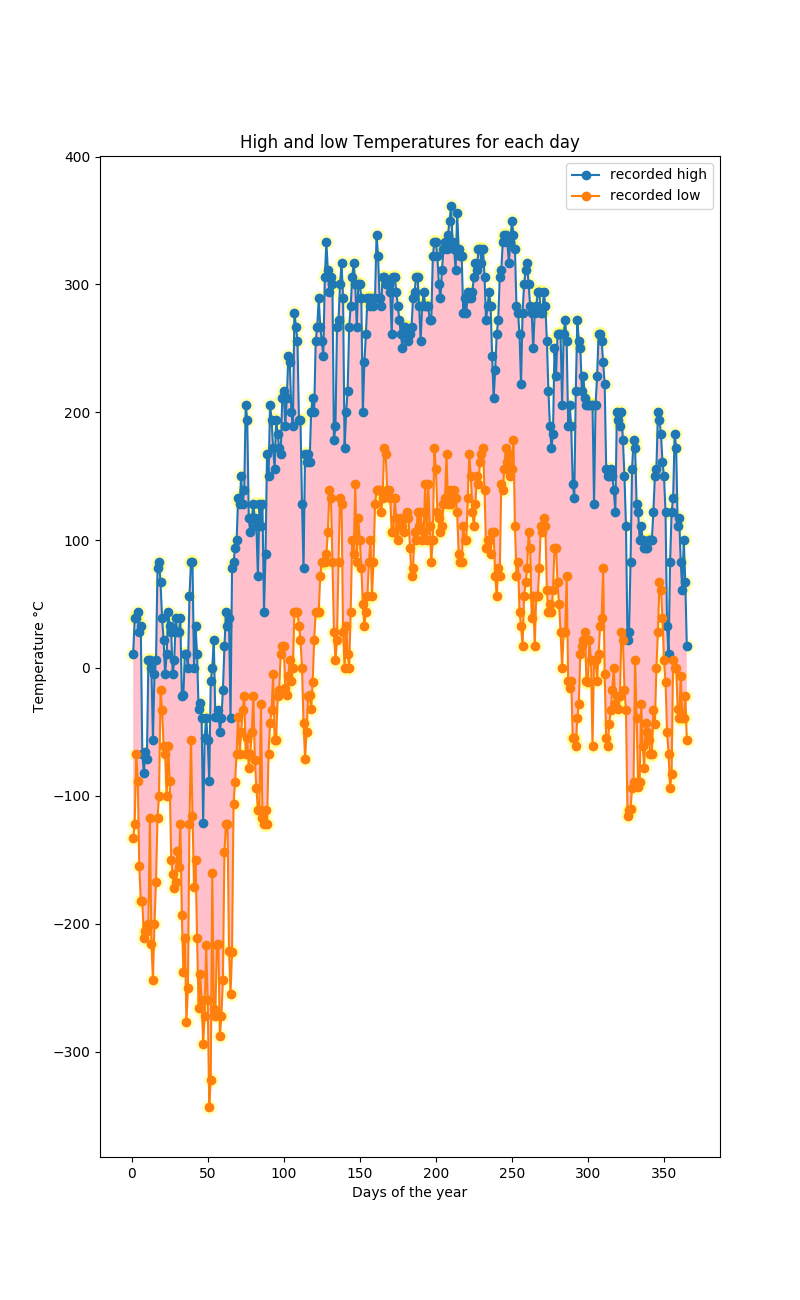

In [459]:
# Finally done with this slow software I did a year. So I need to now do uh.. all the years

plt.figure(figsize=(8,13))
ugh = plt.gca()

x = np.linspace(1,365,365)

ugh.set_xlabel('Days of the year')
ugh.set_ylabel('Temperature °C')
ugh.set_title('High and low Temperatures for each day')

plt.plot(datesforyear,max2015,'-o',datesforyear,min2015,'-o',zorder=3)
ax1.legend(['Recorded High', 'Recorded Low'])

plt.scatter(x,max2015,s=100,c='yellow',zorder=1,alpha=0.2)
plt.scatter(x,min2015,s=100,c='yellow',zorder=1,alpha=0.2)

ugh.legend(['recorded high', 'recorded low '])

ugh.fill_between(x,max2015, min2015, facecolor='pink', alpha=1.0)

for spine in plt.gca().spines.values():
    spine.set_visible(True)

plt.show()

In [460]:
datesforyears = list(range(1,3653))

<IPython.core.display.Javascript object>


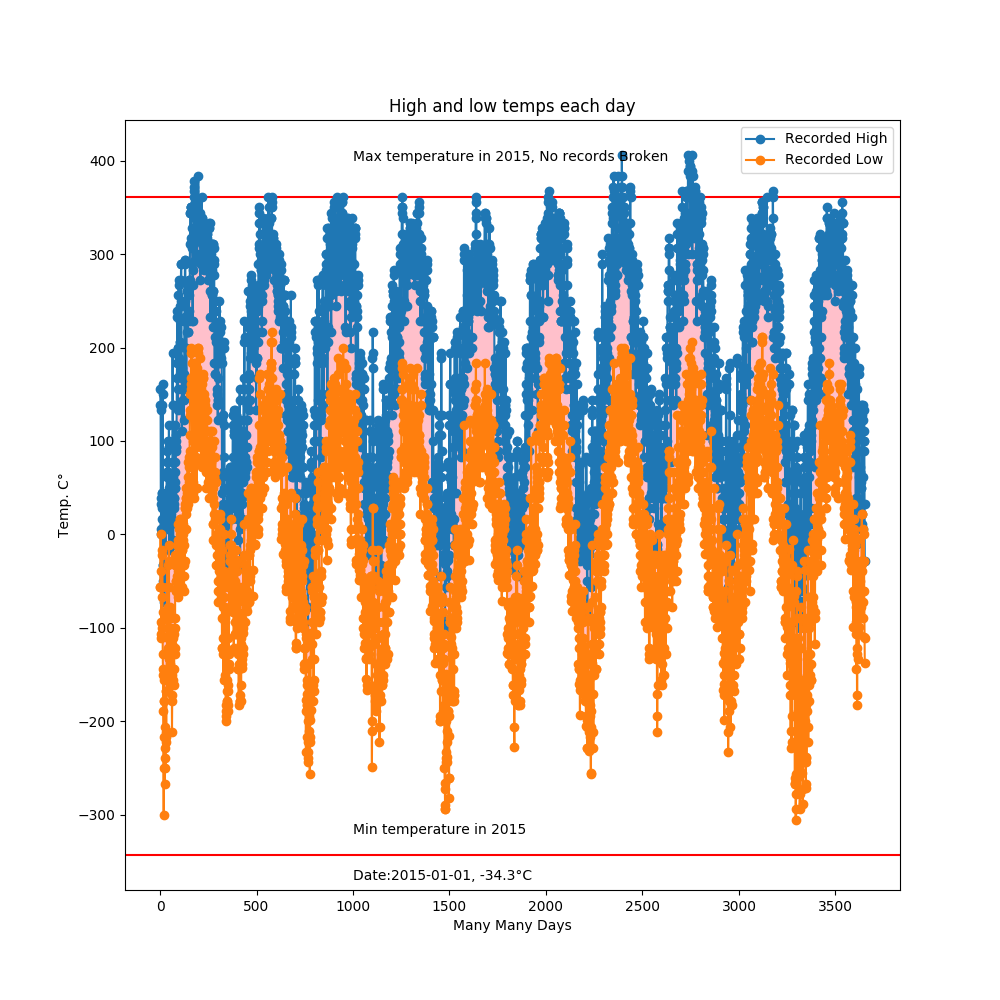

In [461]:
#For an Entire year
x = np.linspace(1,3652,3652)
plt.figure(figsize=(10,10))
ax1 = plt.gca()

ax1.set_xlabel('Many Many Days')
ax1.set_ylabel('Temp. C°')
ax1.set_title('High and low temps each day')


plt.plot(datesforyears,maxoverall,'-o',datesforyears,minoverall,'-o',zorder=3)

ax1.legend(['Recorded High', 'Recorded Low', 'recordhigh', 'recordlow'])
plt.axhline(y=361, color='r', linestyle='-')
plt.show()

plt.axhline(y=-343, label='Min', color='r', linestyle='-')


plt.annotate(
# Label and coordinate
'Max temperature in 2015, No records Broken', xy=(1000, 400), xytext=(1000, 400),)

plt.annotate(
# Label and coordinate
'Min temperature in 2015', xy=(1000, -300), xytext=(1000, -320),)

plt.annotate(
# Label and coordinate
'Date:2015-01-01, -34.3°C', xy=(100, -300), xytext=(1000, -370),)

ax1.fill_between(x,maxoverall,minoverall, facecolor='pink', alpha=1.0)
plt.show()

for spine in plt.gca().spines.values():
    spine.set_visible(True)
ugh = plt.gca()
plt.show()
x = np.linspace(1,365,365)